In [ ]:
from google.colab import drive
#drive.mount('/content/drive/')
drive.mount('/gdrive')
# Change directory to the specified path
%cd /gdrive/MyDrive/images&videos/Face Detection

Mounted at /gdrive
/gdrive/MyDrive/images&videos/Face Detection


In [ ]:
path='/content/drive/MyDrive/images&videos/Face Detection'

In [ ]:
!pip install face_recognition

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 8.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566173 sha256=6d0a1bd3bc208706884201a245982c6a25f4faf8d9b3e46f67bb79a603c56411
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models


In [ ]:
import face_recognition
import numpy as np
from PIL import Image, ImageDraw
from IPython.display import display

In [ ]:
face_1 = face_recognition.load_image_file("Nusrat.jpg")
face_1_encoding = face_recognition.face_encodings(face_1)[0]

face_2 = face_recognition.load_image_file("Arif.jpg")
face_2_encoding = face_recognition.face_encodings(face_2)[0]

face_3 = face_recognition.load_image_file("ertugrul.jpeg")
face_3_encoding = face_recognition.face_encodings(face_3)[0]

known_face_encodings = [
    face_1_encoding,
    face_2_encoding,
    face_2_encoding
]
known_face_names = [
    "Nusrat",
    "Arif",
    "Ertugrul"
]
print("Done learning and creating profiles")

Done learning and creating profiles


Nusrat
Arif
Unknown


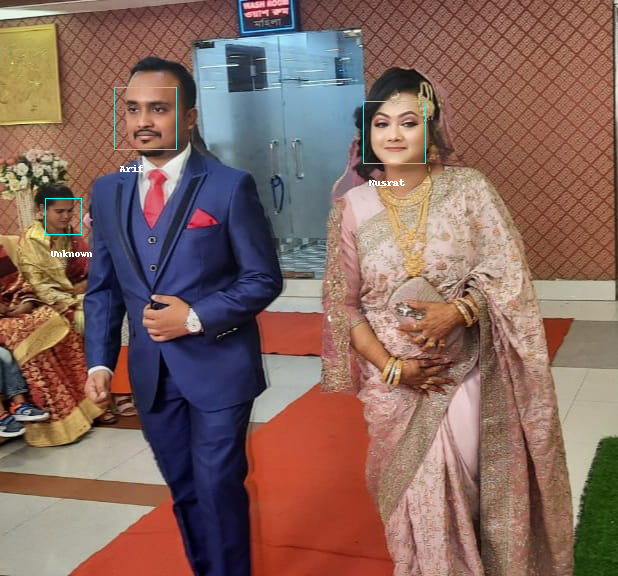

In [ ]:
unknown_image = face_recognition.load_image_file("Both.jpg")

face_locations = face_recognition.face_locations(unknown_image)
face_encodings = face_recognition.face_encodings(unknown_image, face_locations)

pil_image = Image.fromarray(unknown_image)
draw = ImageDraw.Draw(pil_image)

for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
    # See if the face is a match for the known face(s)
    matches = face_recognition.compare_faces(known_face_encodings, face_encoding)

    name = "Unknown"

    face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
    best_match_index = np.argmin(face_distances)
    if matches[best_match_index]:
        name = known_face_names[best_match_index]

    # Draw a box around the face using the Pillow module
    draw.rectangle(((left, top), (right, bottom)), outline=(0, 255, 255))
    print(name)

    # Draw a label with a name below the face
    text_width, text_height = draw.textsize(name)
    # draw.rectangle(((left, bottom - text_height - 10), (right, bottom)), fill=(0, 0, 255), outline=(0, 0, 255))
    draw.text((left + 6, bottom - text_height + 25), name, fill=(255, 255, 255, 255))


# Remove the drawing library from memory as per the Pillow docs
del draw

# Display the resulting image
display(pil_image)